## Задача 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['figure.dpi'] = 100

In [4]:
rootOfF1 = 1.5708
rootOfF2 = 1.2958

In [111]:
def f1(x):
    return 1 / (1 + x * x)

def f2(x):
    return np.power(x, 1/3) * np.exp(np.sin(x))

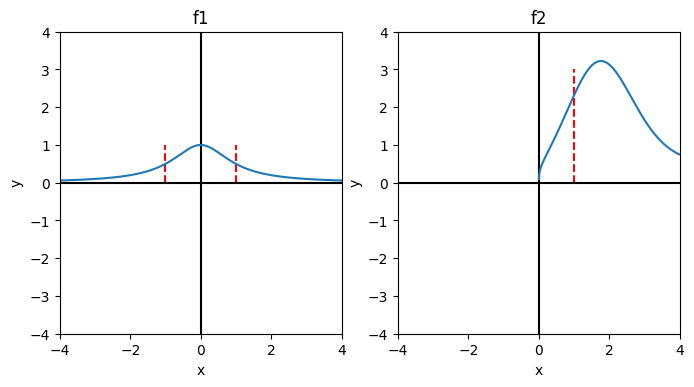

In [122]:
fg, (ax1, ax2) = plt.subplots(1, 2)

x = np.linspace(-10, 10, 10000)

y1 = np.vectorize(f1)(x)
ax1.set_title("f1")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.vlines(x=-1, ymin=0, ymax=1, linestyles='--', color='red')
ax1.vlines(x=1, ymin=0, ymax=1, linestyles='--', color='red')

ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.plot(x, y1)

y2 = np.vectorize(f2)(x[x>0])
ax2.set_title("f2")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.vlines(x=0, ymin=0, ymax=1, linestyles='--', color='red')
ax2.vlines(x=1, ymin=0, ymax=3, linestyles='--', color='red')

ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.plot(x[x>0], y2)

## Time to integrate

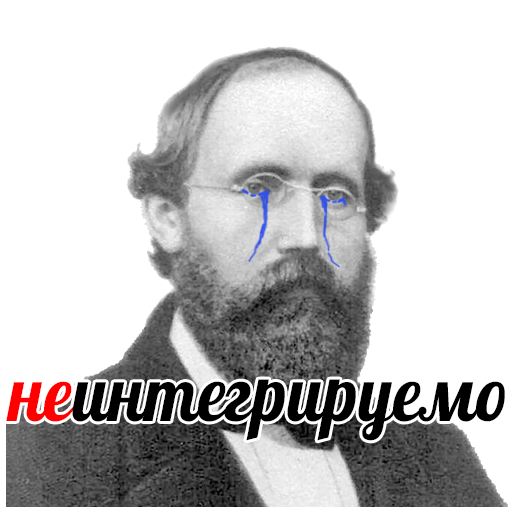 

In [116]:
def integrate(f, a, b, rule, N=2**10):
    h = (b - a) / N
    left = a
    right = a + h
    _sum = 0
    for i in range(N):
        _sum += rule(f, left, right)
        left += h
        right += h
    return _sum * h

### _Left rectangle rule_: $f(a) * (b-a)$
### _Right rectangle rule_: $f(b) * (b-a)$
### _Trapezoidal rule_: $\frac{f(a) + f(b)}{2} * (b-a)$
### _Simpson rule_: $(f(a) + 4 * f(\frac{a+b}{2}) + f(b))*\frac{(b-a)}{6}$

In [117]:
N = np.arange(2, 2**6, 2, dtype=np.int32)

In [118]:
leftRiemann = lambda f, a, b: f(a)
rightRiemann = lambda f, a, b: f(b)
trapezoidalRule = lambda f, a, b: (f(a) + f(b)) / 2
simpsonRule = lambda f, a, b: (f(a) + 4 * f((a+b)/2) + f(b)) / 6

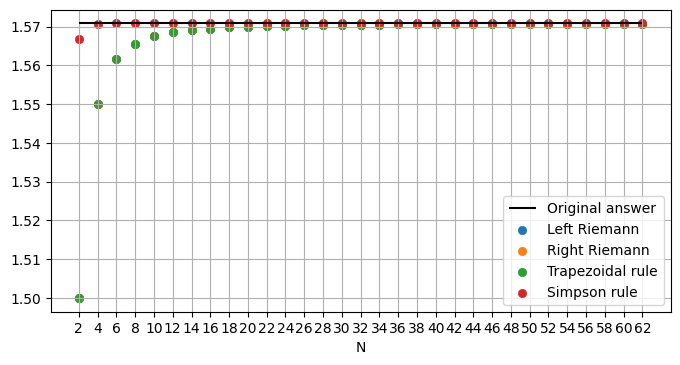

In [119]:
rules = {leftRiemann: [], rightRiemann: [], trapezoidalRule: [], simpsonRule: []}
plt.grid()
plt.hlines(rootOfF1, xmin=N[0], xmax=N[-1], linestyles='solid', colors=[0,0,0], label='Original answer')
plt.xticks(N)
for n in N:
    for rule in rules:
        rules[rule].append(integrate(f1, -1, 1, rule, n))
plt.scatter(N, rules[leftRiemann], label="Left Riemann", linewidths=0.5)
plt.scatter(N, rules[rightRiemann], label="Right Riemann", linewidths=0.5)
plt.scatter(N, rules[trapezoidalRule], label="Trapezoidal rule", linewidths=0.5)
plt.scatter(N, rules[simpsonRule], label="Simpson rule", linewidths=0.5)
plt.xlabel('N')
plt.legend(loc='best')

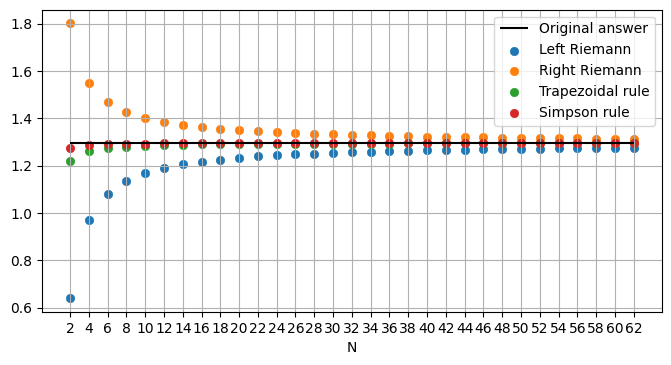

In [120]:
rules = {leftRiemann: [], rightRiemann: [], trapezoidalRule: [], simpsonRule: []}
plt.grid()
plt.hlines(rootOfF2, xmin=N[0], xmax=N[-1], linestyles='solid', colors=[0,0,0], label='Original answer')
plt.xticks(N)
for n in N:
    for rule in rules:
        rules[rule].append(integrate(f2, 0, 1, rule, n))
plt.scatter(N, rules[leftRiemann], label="Left Riemann", linewidths=0.5)
plt.scatter(N, rules[rightRiemann], label="Right Riemann", linewidths=0.5)
plt.scatter(N, rules[trapezoidalRule], label="Trapezoidal rule", linewidths=0.5)
plt.scatter(N, rules[simpsonRule], label="Simpson rule", linewidths=0.5)
plt.xlabel('N')
plt.legend(loc='best')